<a href="https://colab.research.google.com/github/gvogiatzis/trafficsim/blob/main/suptrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/gvogiatzis/trafficsim.git

In [1]:
cd trafficsim

/content/trafficsim


In [ ]:
!wget "https://7d9c-80-195-93-221.ngrok-free.app/sumo_data/flowmat.txt"

In [2]:
from rl import SupervisedLearningPretrainer

import matplotlib.pyplot as plt
import torch
import tqdm
import numpy as np

from rl.models import MLPnet, loadModel, saveModel, loadModel_from_dict
import matplotlib.pyplot as plt

num_epochs = 50
network_layers = "1024x1024"
dataset_size = 1000000
network_layers = [int(s) for s in network_layers.split("x") if s.isnumeric()]
out_model_fname = "sup_model.pt"
flowmat_fname = "flowmat.txt"

Generating dataset:


100%|██████████| 1000000/1000000 [02:03<00:00, 8093.24it/s]


Epoch 1/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 323.88it/s]


Avg Training loss: 0.9773 Avg Training Acc: 63.3 Testing:

Avg Test loss: 0.9197 Avg Test Acc: 66.2

Epoch 2/50 Training:

100%|██████████| 12501/12501 [00:37<00:00, 332.79it/s]


Avg Training loss: 0.6221 Avg Training Acc: 72.9 Testing:

Avg Test loss: 0.6534 Avg Test Acc: 72.2

Epoch 3/50 Training:

100%|██████████| 12501/12501 [00:37<00:00, 336.02it/s]


Avg Training loss: 0.5436 Avg Training Acc: 75.8 Testing:

Avg Test loss: 0.6520 Avg Test Acc: 72.9

Epoch 4/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 324.95it/s]


Avg Training loss: 0.5013 Avg Training Acc: 77.5 Testing:

Avg Test loss: 0.6852 Avg Test Acc: 72.8

Epoch 5/50 Training:

100%|██████████| 12501/12501 [00:37<00:00, 333.60it/s]


Avg Training loss: 0.4730 Avg Training Acc: 78.7 Testing:

Avg Test loss: 0.7135 Avg Test Acc: 72.8

Epoch 6/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 322.21it/s]


Avg Training loss: 0.4518 Avg Training Acc: 79.6 Testing:

Avg Test loss: 0.7568 Avg Test Acc: 72.5

Epoch 7/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 321.05it/s]


Avg Training loss: 0.4327 Avg Training Acc: 80.6 Testing:

Avg Test loss: 0.7913 Avg Test Acc: 72.3

Epoch 8/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 316.33it/s]


Avg Training loss: 0.4170 Avg Training Acc: 81.5 Testing:

Avg Test loss: 0.8532 Avg Test Acc: 72.0

Epoch 9/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 322.07it/s]


Avg Training loss: 0.4020 Avg Training Acc: 82.4 Testing:

Avg Test loss: 0.8885 Avg Test Acc: 71.6

Epoch 10/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 314.60it/s]


Avg Training loss: 0.3880 Avg Training Acc: 83.3 Testing:

Avg Test loss: 0.9353 Avg Test Acc: 71.6

Epoch 11/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 319.34it/s]


Avg Training loss: 0.3723 Avg Training Acc: 84.1 Testing:

Avg Test loss: 0.9944 Avg Test Acc: 71.6

Epoch 12/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 320.70it/s]


Avg Training loss: 0.3602 Avg Training Acc: 84.9 Testing:

Avg Test loss: 1.0581 Avg Test Acc: 70.8

Epoch 13/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 323.22it/s]


Avg Training loss: 0.3475 Avg Training Acc: 85.7 Testing:

Avg Test loss: 1.2060 Avg Test Acc: 70.6

Epoch 14/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 317.67it/s]


Avg Training loss: 0.3355 Avg Training Acc: 86.4 Testing:

Avg Test loss: 1.2193 Avg Test Acc: 71.2

Epoch 15/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 324.04it/s]


Avg Training loss: 0.3243 Avg Training Acc: 87.1 Testing:

Avg Test loss: 1.2538 Avg Test Acc: 71.0

Epoch 16/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 320.21it/s]


Avg Training loss: 0.3146 Avg Training Acc: 87.7 Testing:

Avg Test loss: 1.3115 Avg Test Acc: 71.1

Epoch 17/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 318.29it/s]


Avg Training loss: 0.3051 Avg Training Acc: 88.3 Testing:

Avg Test loss: 1.4132 Avg Test Acc: 70.7

Epoch 18/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 318.86it/s]


Avg Training loss: 0.2964 Avg Training Acc: 88.8 Testing:

Avg Test loss: 1.4515 Avg Test Acc: 70.6

Epoch 19/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 319.62it/s]


Avg Training loss: 0.2894 Avg Training Acc: 89.3 Testing:

Avg Test loss: 1.5441 Avg Test Acc: 71.0

Epoch 20/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 319.51it/s]


Avg Training loss: 0.2820 Avg Training Acc: 89.7 Testing:

Avg Test loss: 1.6832 Avg Test Acc: 70.8

Epoch 21/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 314.80it/s]


Avg Training loss: 0.2764 Avg Training Acc: 90.1 Testing:

Avg Test loss: 1.7206 Avg Test Acc: 70.5

Epoch 22/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 323.48it/s]


Avg Training loss: 0.2707 Avg Training Acc: 90.5 Testing:

Avg Test loss: 1.7944 Avg Test Acc: 70.5

Epoch 23/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 325.59it/s]


Avg Training loss: 0.2646 Avg Training Acc: 90.8 Testing:

Avg Test loss: 1.8788 Avg Test Acc: 70.4

Epoch 24/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 328.95it/s]


Avg Training loss: 0.2603 Avg Training Acc: 91.1 Testing:

Avg Test loss: 1.9506 Avg Test Acc: 70.8

Epoch 25/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 322.56it/s]


Avg Training loss: 0.2566 Avg Training Acc: 91.4 Testing:

Avg Test loss: 1.9792 Avg Test Acc: 70.6

Epoch 26/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 327.82it/s]


Avg Training loss: 0.2519 Avg Training Acc: 91.7 Testing:

Avg Test loss: 2.0777 Avg Test Acc: 70.4

Epoch 27/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 325.70it/s]


Avg Training loss: 0.2484 Avg Training Acc: 91.9 Testing:

Avg Test loss: 2.1647 Avg Test Acc: 70.1

Epoch 28/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 324.40it/s]


Avg Training loss: 0.2455 Avg Training Acc: 92.2 Testing:

Avg Test loss: 2.2061 Avg Test Acc: 69.9

Epoch 29/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 324.12it/s]


Avg Training loss: 0.2436 Avg Training Acc: 92.4 Testing:

Avg Test loss: 2.3127 Avg Test Acc: 70.6

Epoch 30/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 325.22it/s]


Avg Training loss: 0.2394 Avg Training Acc: 92.6 Testing:

Avg Test loss: 2.3994 Avg Test Acc: 70.6

Epoch 31/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 328.03it/s]


Avg Training loss: 0.2378 Avg Training Acc: 92.7 Testing:

Avg Test loss: 2.4068 Avg Test Acc: 70.2

Epoch 32/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 324.66it/s]


Avg Training loss: 0.2323 Avg Training Acc: 93.0 Testing:

Avg Test loss: 2.5158 Avg Test Acc: 70.4

Epoch 33/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 319.94it/s]


Avg Training loss: 0.2331 Avg Training Acc: 93.1 Testing:

Avg Test loss: 2.6058 Avg Test Acc: 70.2

Epoch 34/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 318.75it/s]


Avg Training loss: 0.2299 Avg Training Acc: 93.3 Testing:

Avg Test loss: 2.6916 Avg Test Acc: 70.4

Epoch 35/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 320.59it/s]


Avg Training loss: 0.2269 Avg Training Acc: 93.5 Testing:

Avg Test loss: 2.7267 Avg Test Acc: 69.9

Epoch 36/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 320.99it/s]


Avg Training loss: 0.2241 Avg Training Acc: 93.7 Testing:

Avg Test loss: 2.8293 Avg Test Acc: 70.4

Epoch 37/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 318.23it/s]


Avg Training loss: 0.2250 Avg Training Acc: 93.7 Testing:

Avg Test loss: 2.8731 Avg Test Acc: 70.3

Epoch 38/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 317.96it/s]


Avg Training loss: 0.2225 Avg Training Acc: 93.9 Testing:

Avg Test loss: 2.9602 Avg Test Acc: 70.5

Epoch 39/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 316.33it/s]


Avg Training loss: 0.2209 Avg Training Acc: 94.0 Testing:

Avg Test loss: 3.0132 Avg Test Acc: 70.0

Epoch 40/50 Training:

100%|██████████| 12501/12501 [00:40<00:00, 311.74it/s]


Avg Training loss: 0.2178 Avg Training Acc: 94.2 Testing:

Avg Test loss: 3.1112 Avg Test Acc: 70.4

Epoch 41/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 316.66it/s]


Avg Training loss: 0.2166 Avg Training Acc: 94.3 Testing:

Avg Test loss: 3.1796 Avg Test Acc: 70.5

Epoch 42/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 312.54it/s]


Avg Training loss: 0.2161 Avg Training Acc: 94.4 Testing:

Avg Test loss: 3.2298 Avg Test Acc: 70.5

Epoch 43/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 314.97it/s]


Avg Training loss: 0.2151 Avg Training Acc: 94.5 Testing:

Avg Test loss: 3.4052 Avg Test Acc: 70.4

Epoch 44/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 318.43it/s]


Avg Training loss: 0.2131 Avg Training Acc: 94.6 Testing:

Avg Test loss: 3.4389 Avg Test Acc: 70.6

Epoch 45/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 313.99it/s]


Avg Training loss: 0.2124 Avg Training Acc: 94.7 Testing:

Avg Test loss: 3.5040 Avg Test Acc: 70.3

Epoch 46/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 316.24it/s]


Avg Training loss: 0.2131 Avg Training Acc: 94.8 Testing:

Avg Test loss: 3.5809 Avg Test Acc: 70.4

Epoch 47/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 317.22it/s]


Avg Training loss: 0.2118 Avg Training Acc: 94.8 Testing:

Avg Test loss: 3.6315 Avg Test Acc: 70.2

Epoch 48/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 314.46it/s]


Avg Training loss: 0.2113 Avg Training Acc: 95.0 Testing:

Avg Test loss: 3.6929 Avg Test Acc: 70.4

Epoch 49/50 Training:

100%|██████████| 12501/12501 [00:39<00:00, 316.51it/s]


Avg Training loss: 0.2094 Avg Training Acc: 95.0 Testing:

Avg Test loss: 3.8393 Avg Test Acc: 70.6

Epoch 50/50 Training:

100%|██████████| 12501/12501 [00:38<00:00, 321.36it/s]


Avg Training loss: 0.2071 Avg Training Acc: 95.1 Testing:

Avg Test loss: 3.8314 Avg Test Acc: 70.5

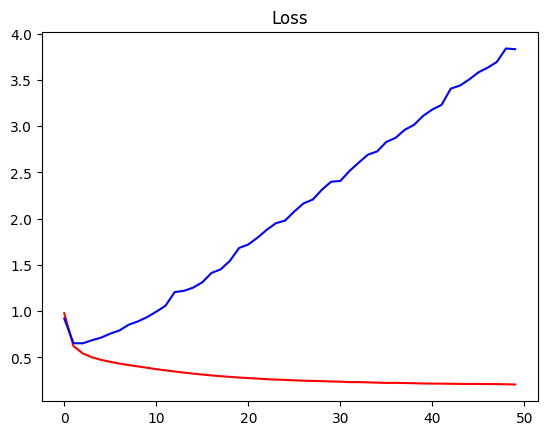

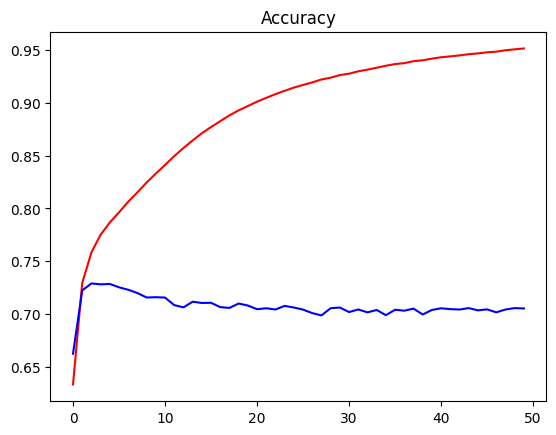

In [3]:
dataset = []
W = np.loadtxt(flowmat_fname)

output_dim, input_dim = W.shape
Wtorch = torch.tensor(W,dtype=torch.float32)
print("Generating dataset:")
for i in tqdm.tqdm(range(dataset_size)):
    x = 50*torch.randn(size=(input_dim,), dtype=torch.float32)
    a = np.argsort(Wtorch @ x)
    t = a[0]
    dataset.append((x, t))
model = MLPnet(input_dim,*network_layers,output_dim)
trainer = SupervisedLearningPretrainer(dataset, model,use_gpu=True)

stats = trainer.train_epochs(num_epochs)

saveModel(model, out_model_fname)
plt.figure()
plt.title("Loss")
plt.plot(stats["training_loss_series"], 'r-')
plt.plot(stats["test_loss_series"], 'b-')
plt.figure()
plt.title("Accuracy")
plt.plot(stats["training_acc_series"], 'r-')
plt.plot(stats["test_acc_series"], 'b-')
plt.show()